In [1]:
from pathlib import Path
from utils.vis_utils import model_params,visualization_pre,visualization_bbox, visualization_bbox_dir,visualization_pre_dir
from utils.eff_utils import load_yaml
path = Path.cwd()

/home/mazheng/miniconda3/envs/eff/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [3]:
compound_coef = 2
threshold = 0.3
iou_threshold = 0.2

# project_name = "pothole"
# # model_path = 'logs/pothole/efficientdet-d2_199_12000.pth'
# model_path = 'logs/pothole/efficientdet-d2_99_6000.pth'

project_name = "pounding"
model_path = 'logs/pounding/efficientdet-d2_199_12000.pth'
# model_path = 'logs/pounding/efficientdet-d2_99_6000.pth'

# project_name = "crack"
# model_path = 'logs/crack/efficientdet-d2_199_12000.pth'
# # model_path = 'logs/crack/efficientdet-d2_99_6000.pth'

In [4]:
ann_json = path / 'datasets/{}/annotations/instances_val.json'.format(project_name)
img_path = path / 'datasets/{}/val'.format(project_name)
yaml_path = path / 'projects/{}.yml'.format(project_name)

project_params = load_yaml(str(yaml_path))

ratios=eval(project_params['anchors_ratios'])
scales=eval(project_params['anchors_scales'])
# scales=[(2 ** 0)/2, (2 ** (1.0 / 3.0))/2, (2 ** (2.0 / 3.0))/2]
# ratios=[(0.6, 1.6), (1.2, 0.8), (1.7, 0.6)]
obj_list = project_params['obj_list']
params = model_params(compound_coef, obj_list, ratios, scales, model_path)

In [5]:
params

model_params(compound_coef=2, obj_list=['pounding'], ratios=[(1.3, 0.7), (1.7, 0.6), (2.1, 0.5)], scales=[0.5, 0.6299605249474366, 0.7937005259840997], model_path='logs/pounding/efficientdet-d2_199_12000.pth')

In [6]:
# visualization_bbox_dir(str(ann_json),str(img_path),"fig/{}/val/true_bbox".format(project_name))
# visualization_pre_dir(params, str(img_path), threshold, iou_threshold, save_path="fig/{}/val/pre_bbox_1".format(project_name))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


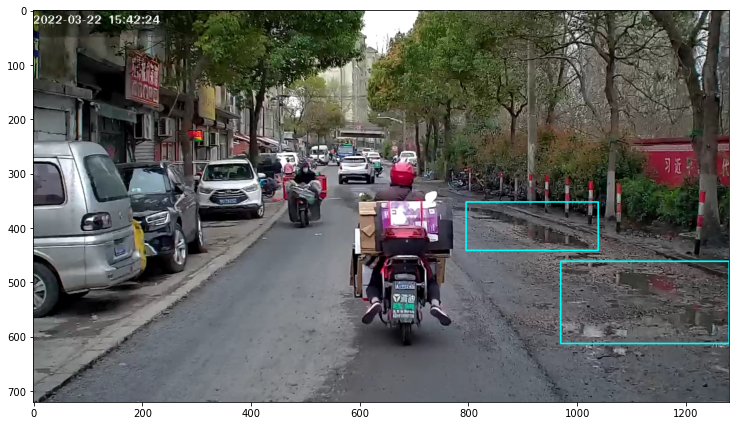

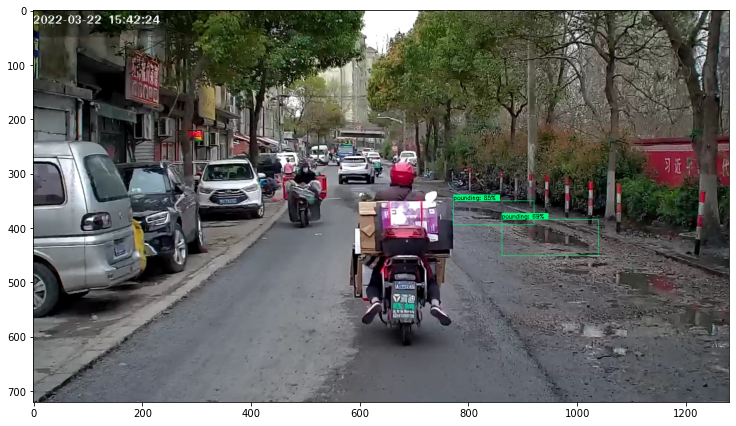

In [8]:
img_name = "JS12102.jpg"
visualization_bbox(img_name,str(ann_json),str(img_path))
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
    force_input_size=1024
)

In [50]:
import json
with open(str(ann_json)) as f:
    ann=json.load(f)

img_id = list(set(i['image_id'] for i in ann["annotations"]))
img_ann = [ann['images'][i] for i in img_id]
img_name_list = [f['file_name'] for f in img_ann]

# img_name_list = []
# for f in img_path.iterdir():
#     img_name_list.append(f.name)

In [65]:
i = 0

KC247.jpg
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


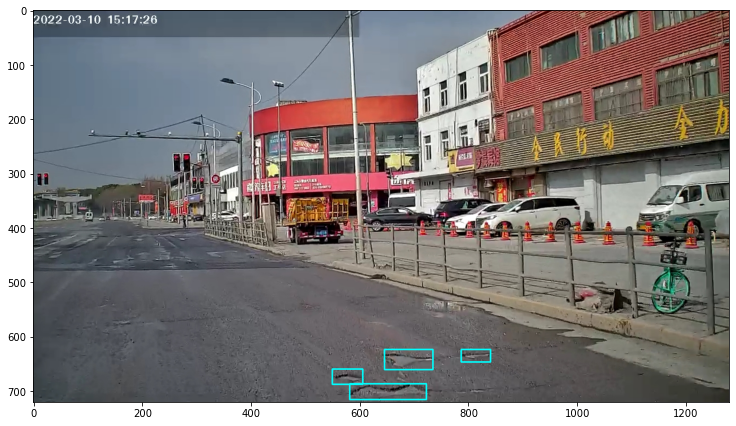

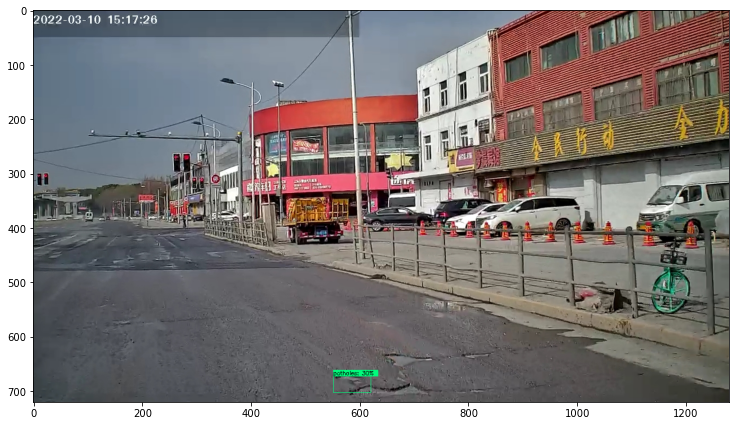

In [71]:
# input_sizes=[512, 640, 768, 896, 1024, 1280, 1280, 1536]
img_name = img_name_list[i]
print(img_name)
visualization_bbox(img_name,str(ann_json),str(img_path))
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
    force_input_size=1024
)
i+=1

In [375]:
os.environ["WEIGHT_PATH"] = str(model_path)
os.environ["COEF"] = str(compound_coef)
os.environ["PROJECT"] = str(project_name)
# !$WEIGHT_DIR
# ! echo $COEF
! python coco_eval.py -c $COEF -p $PROJECT -w $WEIGHT_PATH  -s False -f 2

running coco-style evaluation on project crack, weights logs/crack/efficientdet-d2_199_12000.pth...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
100%|█████████████████████████████████████████| 121/121 [00:12<00:00,  9.62it/s]
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).


In [376]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [377]:
# SET_NAME = ann_path_val
VAL_GT = str(ann_json)
VAL_IMGS = str(img_path)
pred_json_path = 'val_bbox_results.json'
MAX_IMAGES = 10000
coco_gt = COCO(VAL_GT)
image_ids = coco_gt.getImgIds()[:MAX_IMAGES]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


# Crack

In [378]:
# _eval(coco_gt, image_ids, pred_json_path)
coco_pred = coco_gt.loadRes(pred_json_path)

# run COCO evaluation
print("BBox")
coco_eval = COCOeval(coco_gt, coco_pred, "bbox")
coco_eval.params.imgIds = image_ids
# coco_eval.params.catIds = [1,2,3]
coco_eval.params.catIds = 1
coco_eval.params.iouThrs = [0.2]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
bbox_count: 45
tp: 7.0
fp: 13.0
fn: 38.0
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=medium | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= large | maxDets=100 ] = 0.217
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=  1 ] = 0.133
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets= 10 ] = 0.156
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.156
 Average Recall     

# Pounding

In [363]:
# _eval(coco_gt, image_ids, pred_json_path)
coco_pred = coco_gt.loadRes(pred_json_path)

# run COCO evaluation
print("BBox")
coco_eval = COCOeval(coco_gt, coco_pred, "bbox")
coco_eval.params.imgIds = image_ids
# coco_eval.params.catIds = [1,2,3]
coco_eval.params.catIds = 1
coco_eval.params.iouThrs = [0.2]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
bbox_count: 43
tp: 28.0
fp: 37.0
fn: 15.0
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=medium | maxDets=100 ] = 0.916
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= large | maxDets=100 ] = 0.464
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=  1 ] = 0.395
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets= 10 ] = 0.651
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.651
 Average Recall   

# Potholes

In [352]:
# _eval(coco_gt, image_ids, pred_json_path)
coco_pred = coco_gt.loadRes(pred_json_path)

# run COCO evaluation
print("BBox")
coco_eval = COCOeval(coco_gt, coco_pred, "bbox")
coco_eval.params.imgIds = image_ids
# coco_eval.params.catIds = [1,2,3]
coco_eval.params.catIds = 1
coco_eval.params.iouThrs = [0.2]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
bbox_count: 25
tp: 7.0
fp: 6.0
fn: 18.0
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= small | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=medium | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= large | maxDets=100 ] = 0.228
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=  1 ] = 0.240
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.280
 Average Recall     (